# Notebook para visualizar resultados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_model_metrics_heatmap(file_path, metrics=None, figsize=(12, 8)):
    """
    Plota um heatmap das métricas dos modelos.
    
    Parâmetros:
    -----------
    file_path : str
        Caminho para o arquivo CSV com as métricas
    metrics : list
        Lista de métricas para mostrar (default: todas exceto 'Model')
    figsize : tuple
        Tamanho da figura (width, height)
    """
    # Ler o arquivo CSV
    df = pd.read_csv(file_path, sep=';')
    
    # Definir métricas padrão se não especificadas
    if metrics is None:
        metrics = [col for col in df.columns if col != 'Model']
    
    # Preparar dados para o heatmap
    heatmap_data = df.set_index('Model')[metrics]
    
    # Criar figura
    plt.figure(figsize=figsize)
    
    # Plotar heatmap
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd',
                cbar_kws={'label': 'Score'})
    
    plt.title('Model Performance Metrics Heatmap')
    plt.xlabel('Metrics')
    plt.ylabel('Model')
    
    # Ajustar layout
    plt.tight_layout()
    plt.show()



In [3]:
def plot_grouped_metrics(file_path, value_vars=['CV Score', 'balanced_accuracy-test', 
                                                'f1-score-test',
                                                ], sort_by='CV Score', figsize=(15, 8)):
    """
    Plota um gráfico de barras agrupadas com todas as métricas por modelo,
    ordenado pela métrica escolhida.
    
    Parâmetros:
    -----------
    file_path : str
        Caminho para o arquivo CSV com as métricas
    sort_by : str
        Métrica pela qual ordenar os resultados
    figsize : tuple
        Tamanho da figura (width, height)
    """
    # Ler o arquivo CSV
    df = pd.read_csv(file_path, sep=';')

    # Ordenar os modelos pela métrica escolhida
    modelo_ordem = df.sort_values(sort_by)['Model'].values

    # Transformar os dados para formato "long" (melhor para o seaborn)
    df_melted = pd.melt(df,
                        id_vars=['Model'],
                        value_vars=value_vars,
                        var_name='Metric',
                        value_name='Score')

    # Criar figura
    plt.figure(figsize=figsize)

    # Criar o gráfico de barras agrupadas
    sns.barplot(data=df_melted,
                x='Model',
                y='Score',
                hue='Metric',
                order=modelo_ordem)

    # Definir limite do eixo y para 1
    plt.ylim(0, 1)

    # Rotacionar labels do eixo x para melhor legibilidade
    plt.xticks(rotation=45, ha='right')

    # Ajustar títulos e labels
    plt.title(f'Model Performance Metrics (Sorted by {sort_by})')
    plt.xlabel('Model')
    plt.ylabel('Score')

    # Ajustar a legenda
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0.,
               title='Metrics')

    # Adicionar grid para facilitar a leitura plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Ajustar layout para não cortar a legenda
    plt.tight_layout()

    plt.show()

    # Imprimir tabela com valores ordenados
    print("\nValores ordenados por", sort_by)
    display(df.sort_values(sort_by, ascending=False)
            [['Model', sort_by]].round(4))

# Exemplo de uso:
# plot_grouped_metrics('_Final_Combined_All_avg_metrics_report.csv',
#                     sort_by='f1-score-test',
#                     figsize=(15, 8))

In [7]:
import os
path = "/Users/patricia/Documents/code/python-code/behavior-detection/output"
# path = "/Users/patricia/Downloads"
os.chdir(path)

results_file_path = 'consolidated_metrics.csv'
plot_model_metrics_heatmap(results_file_path,
                         metrics=['CV Score', 'f1-score-test', 'balanced_accuracy-test'],
                         figsize=(10, 8))

FileNotFoundError: [Errno 2] No such file or directory: 'consolidated_metrics.csv'

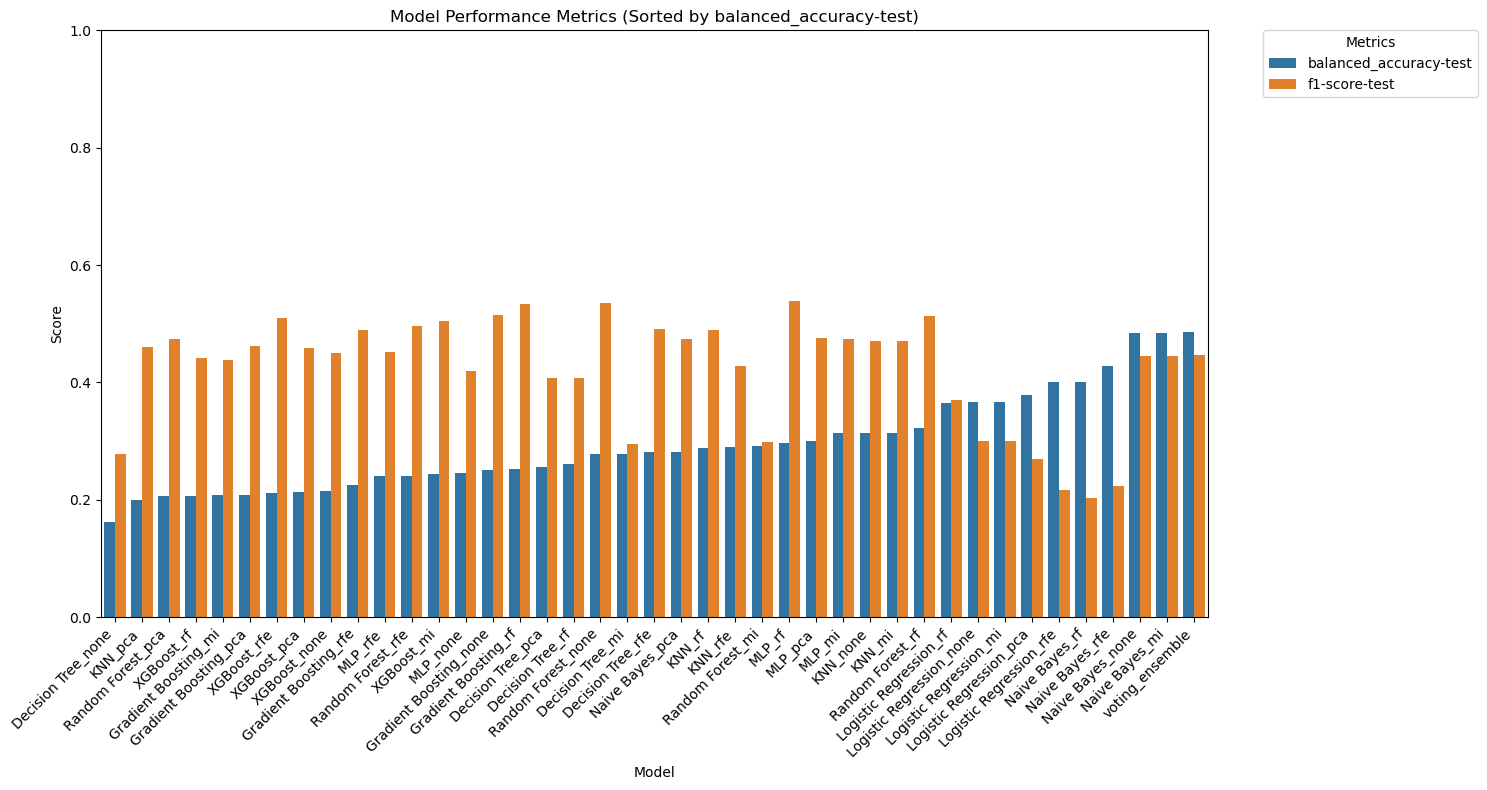


Valores ordenados por balanced_accuracy-test


,Model,balanced_accuracy-test
40,voting_ensemble,0.4867
4,Naive Bayes_mi,0.4835
0,Naive Bayes_none,0.4835
2,Naive Bayes_rfe,0.4284
3,Naive Bayes_rf,0.4013
7,Logistic Regression_rfe,0.4001
6,Logistic Regression_pca,0.3784
5,Logistic Regression_none,0.3665
9,Logistic Regression_mi,0.3665
8,Logistic Regression_rf,0.3642


In [6]:
plot_grouped_metrics(results_file_path, 
                     value_vars=['balanced_accuracy-test', 'f1-score-test'], 
                     sort_by='balanced_accuracy-test', figsize=(15, 8))